## Modelo de regresión lineal 
## datos ficticios generados 
* v=v a+b*x
* x= 100 valores distribuidos segun una normal N(1.5, 2.5)
* Ye = 2 + 1.9*x + e
* e esta distribuida segun una normal N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x =  1.5 +2.5 *np.random.randn(100)

In [3]:
res= 0 + 0.8 *np.random.randn(100)

In [4]:
y_pred =  5 + 1.9 * x

In [5]:
y_act = 5 + 1.9 *x + res

In [6]:
x_list = x.tolist()
y_pred_lits = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame({
    "x":x_list,
    "y_actual":y_act_list,
    "y_prediccion":y_pred_lits
})

In [8]:
data.head()

,x,y_actual,y_prediccion
0,0.189665,4.659539,5.360363
1,-1.561010,2.424036,2.034081
2,2.958949,10.527352,10.622003
3,-3.201487,-1.489193,-1.082825
4,5.455127,16.783777,15.364741


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list)+1)]

Text(0.5, 1.0, 'Valor actual v/s Predicción')

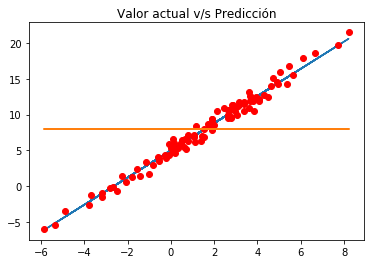

In [11]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act,'ro')
plt.plot(x,y_mean)
plt.title("Valor actual v/s Predicción")

In [12]:
data["SSR"]=(data["y_prediccion"]-np.mean(y_act))**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-np.mean(y_act))**2

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,0.189665,4.659539,5.360363,6.582336,0.491155,10.669571
1,-1.561010,2.424036,2.034081,34.714345,0.152064,30.271276
2,2.958949,10.527352,10.622003,7.268596,0.008959,6.767193
3,-3.201487,-1.489193,-1.082825,81.158381,0.165134,88.645275
4,5.455127,16.783777,15.364741,55.335323,2.013663,78.460754


In [14]:
SSR=sum(data["SSR"])
SSD=sum(data["SSD"])
SST=sum(data["SST"])

In [15]:
SSR

2741.1153815876733

In [16]:
SSD

51.0140049057781

In [17]:
SST

2885.4381925894577

In [18]:
SSR+SSD

2792.1293864934514

In [19]:
R2= SSR/SST

In [20]:
R2

0.9499823592227891

(array([ 8.,  6., 11., 16., 19., 12., 15., 10.,  2.,  1.]),
 array([-1.49618414, -1.16457164, -0.83295913, -0.50134662, -0.16973412,
         0.16187839,  0.4934909 ,  0.8251034 ,  1.15671591,  1.48832842,
         1.81994093]),
 <a list of 10 Patch objects>)

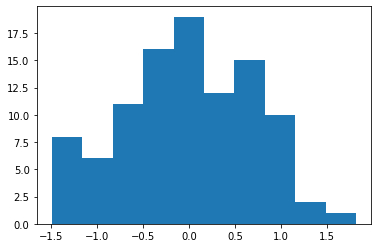

In [21]:
plt.hist(data["y_prediccion"]-data["y_actual"])

In [22]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])

In [23]:
x_mean, y_mean

(1.526644193434808, 7.925969451012191)

In [24]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [25]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [26]:
alpha =  y_mean -beta *x_mean

In [27]:
alpha ,beta

(4.975907072143945, 1.9323837155734889)

## Error estándar de los residuos para 
## validar el modelo, mientra mas pequeño el RSE mejor

In [29]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.721492252534373

In [30]:
np.mean(data["y_actual"])

7.925969451012191

In [31]:
RSE/ np.mean(data["y_actual"])

0.09102889646417124